<a href="https://colab.research.google.com/github/Ankit7557/MLnow_2.0/blob/main/o3_LinearRegression/3.2_Multivariate_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Students Performance in Exams](https://www.kaggle.com/spscientist/students-performance-in-exams)

**Date Created**: 20th June , 2021

Topic: Multivariate Linear Regression

**Author**:
 Ankit Prajapati

 **Reach out**:
[GitHub](https://github.com/Ankit7557) | [LinkedIn](https://www.linkedin.com/in/ankit-prajapati-899a66184/)

[[Assessment Repository](https://github.com/Ankit7557/MLnow_2.0)]


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd '/content/drive/MyDrive/ML/eda_02/student_performance'


/content/drive/MyDrive/ML/eda_02/student_performance


In [3]:
ls

cleanStudentData.csv  StudentsPerformance.csv


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [5]:
import os

In [6]:
studData=pd.read_csv('StudentsPerformance.csv')

In [7]:
studData.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


##Data Processing


Categorical to numeric value conversion

In [8]:
categorical_column=[col for col in studData.columns if studData[col].dtype=='object']
print(categorical_column)  

['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [9]:
for col in categorical_column:
  print('{} has {} valies'.format(col,studData[col].unique()))

gender has ['female' 'male'] valies
race/ethnicity has ['group B' 'group C' 'group A' 'group D' 'group E'] valies
parental level of education has ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school'] valies
lunch has ['standard' 'free/reduced'] valies
test preparation course has ['none' 'completed'] valies


In [10]:
#convert the categories into numbers 

#binary valued
studData['gender']=studData['gender'].apply({'female':1,'male':2}.get)
studData['test preparation course']=studData['test preparation course'].apply({'none':1,'completed':2}.get)

#multi-valued
studData['parental level of education']=studData['parental level of education'].apply({ "master's degree":1 ,"bachelor's degree":2,"associate's degree":3,'some college':4,
 'high school':5, 'some high school':6}.get)

In [11]:
studData.drop(['race/ethnicity','lunch'],axis='columns',inplace=True)

In [12]:
studData.head()

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,1,2,1,72,72,74
1,1,4,2,69,90,88
2,1,1,1,90,95,93
3,2,3,1,47,57,44
4,2,4,1,76,78,75


In [13]:
studData.to_csv('cleanMultivariateStudentData.csv')

In [14]:
ls

cleanMultivariateStudentData.csv  cleanStudentData.csv  StudentsPerformance.csv


## Data Visualization

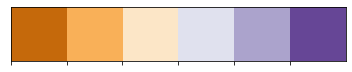

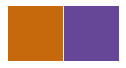

In [15]:
import seaborn as sns
sns.palplot(sns.color_palette('PuOr'))
pal=sns.color_palette('PuOr',6)
pal.as_hex()

plt.style.use(['seaborn'])
sns_colors = ['#c6690c', '#664697']
sns.set_palette(sns_colors)
sns.palplot(sns.color_palette(sns_colors))

In [16]:
studData.columns

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score', 'writing score'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

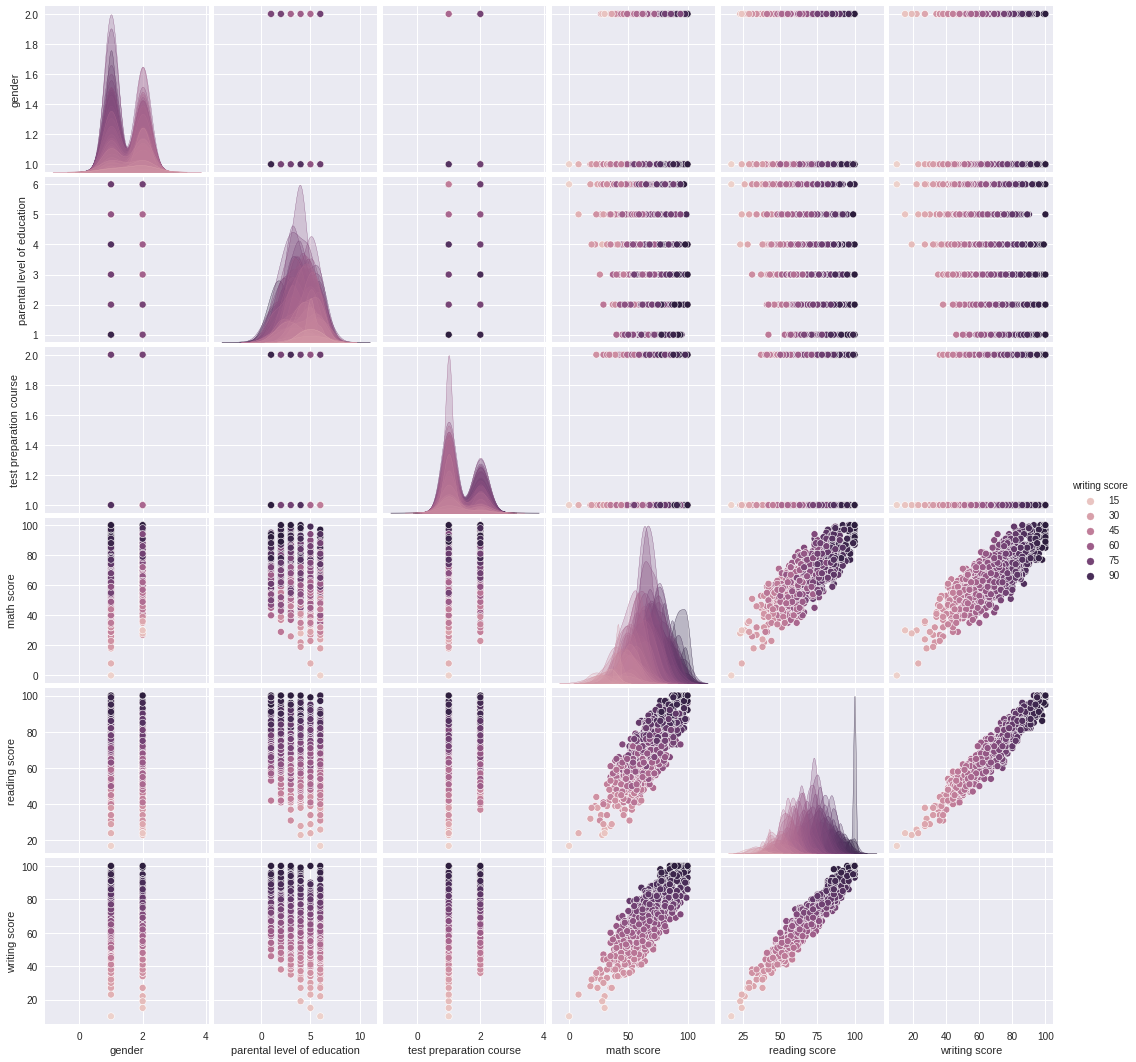

In [18]:
sns.pairplot(studData,
             x_vars=['gender', 'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'],
              y_vars=['gender', 'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'],
                diag_kind='kde',hue='writing score')

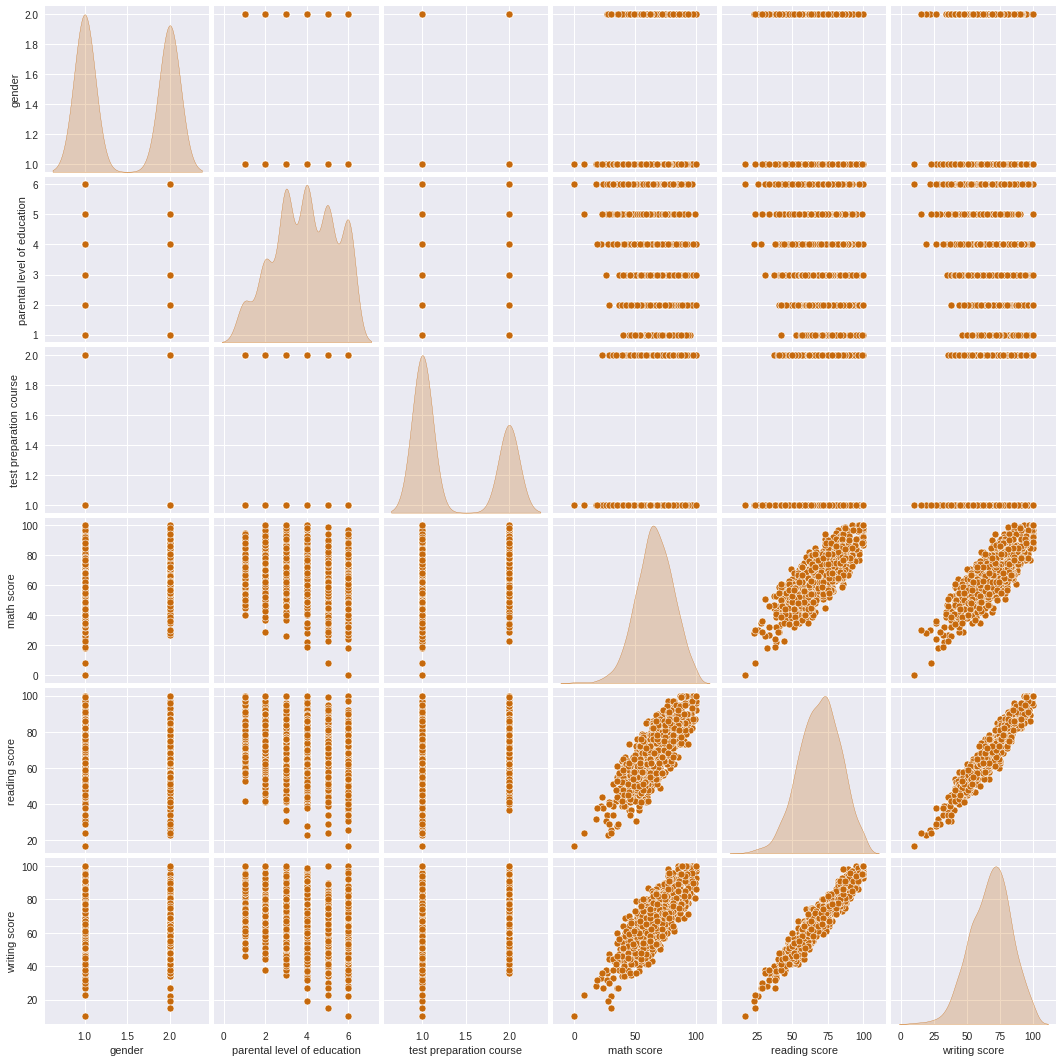

In [ ]:
sns.pairplot(studData,
             x_vars=['gender', 'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'],
              y_vars=['gender', 'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'],
                diag_kind='kde')

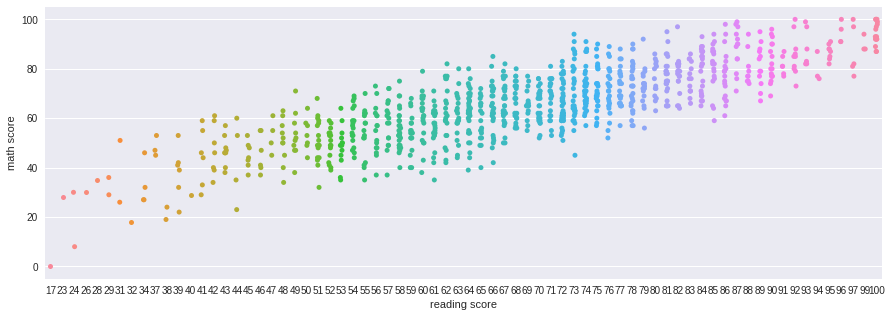

In [19]:
fig = plt.subplots(figsize=(15,5))
sns.stripplot(x='reading score',y='math score',data=studData)

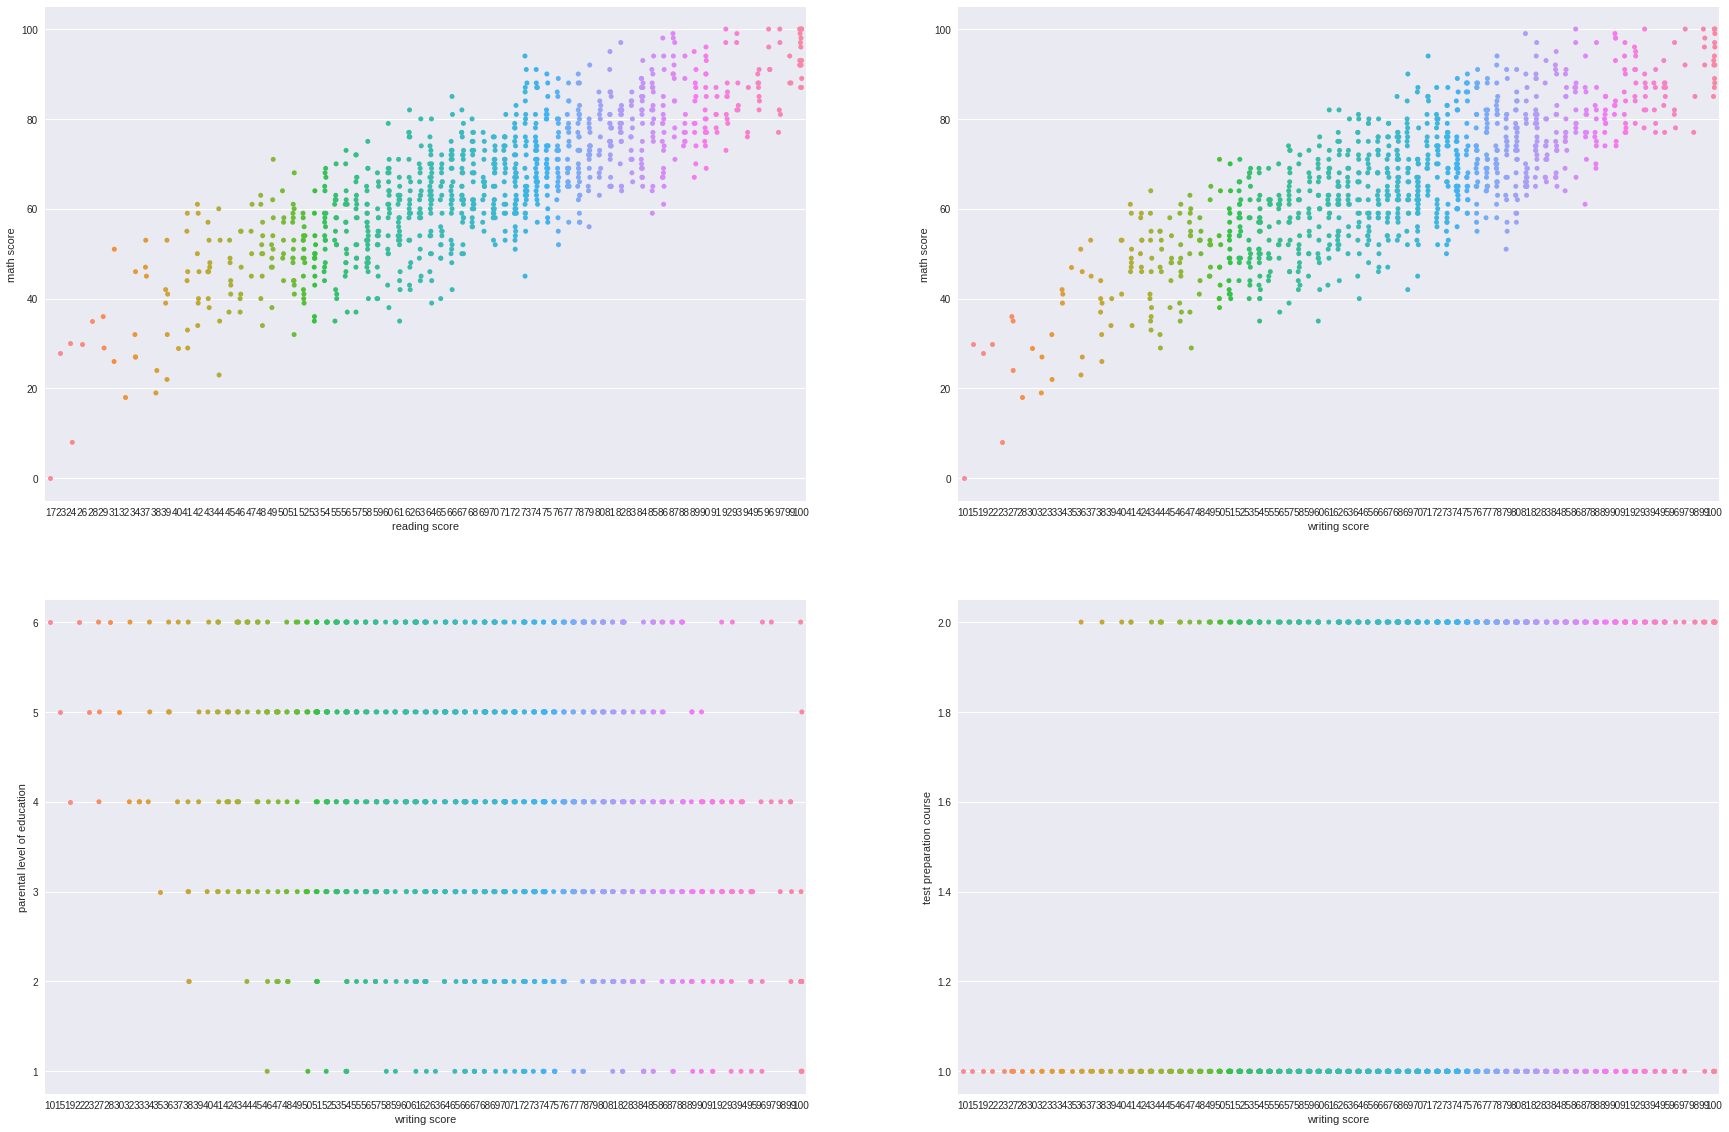

In [20]:
'parental level of education', 'test preparation course','math score', 'reading score', 'writing score'

fig, axarr = plt.subplots(2,2, figsize=(30,20))

sns.stripplot(y='math score', x='reading score', data=studData, hue=None, ax=axarr[0][0])
sns.stripplot(y='math score', x='writing score', data=studData, hue=None, ax=axarr[0][1])
sns.stripplot(y='parental level of education', x='writing score', data=studData, hue=None, ax=axarr[1][0])
sns.stripplot(y='test preparation course', x='writing score', data=studData, hue=None,  ax=axarr[1][1])


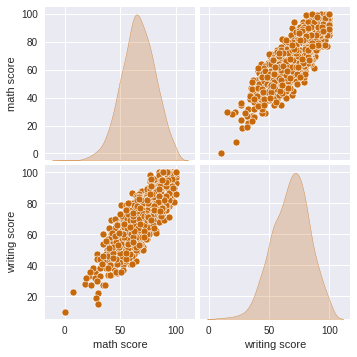

In [ ]:
sns.pairplot(studData,
             x_vars=['math score','writing score'],
             y_vars=['math score', 'writing score'],
          diag_kind='kde')

## Data Split

In [24]:
trainData=studData.sample(frac=0.75,random_state=0)
testData=studData.drop(trainData.index)

print(trainData.head()," ", trainData.shape)
print(testData.head()," ", testData.shape)

     gender  parental level of education  ...  reading score  writing score
993       1                            2  ...             72             74
859       2                            3  ...             73             72
298       2                            5  ...             46             50
553       2                            4  ...             62             64
672       1                            4  ...             78             76

[5 rows x 6 columns]   (750, 6)
    gender  parental level of education  ...  reading score  writing score
9        1                            5  ...             60             50
11       2                            3  ...             52             43
19       1                            3  ...             58             61
23       1                            6  ...             73             73
24       2                            2  ...             71             80

[5 rows x 6 columns]   (250, 6)


In [25]:
trainFeatures = trainData.copy()
testFeatures = testData.copy()

print(trainFeatures.head())
print(testFeatures.head())

     gender  parental level of education  ...  reading score  writing score
993       1                            2  ...             72             74
859       2                            3  ...             73             72
298       2                            5  ...             46             50
553       2                            4  ...             62             64
672       1                            4  ...             78             76

[5 rows x 6 columns]
    gender  parental level of education  ...  reading score  writing score
9        1                            5  ...             60             50
11       2                            3  ...             52             43
19       1                            3  ...             58             61
23       1                            6  ...             73             73
24       2                            2  ...             71             80

[5 rows x 6 columns]


In [26]:
trainLabels=trainFeatures.pop('writing score')
testLabels=testFeatures.pop('writing score')

print(trainLabels.head())
print(testLabels.head())

993    74
859    72
298    50
553    64
672    76
Name: writing score, dtype: int64
9     50
11    43
19    61
23    73
24    80
Name: writing score, dtype: int64


In [27]:
print(trainFeatures.head())
print(testFeatures.head())

     gender  parental level of education  ...  math score  reading score
993       1                            2  ...          62             72
859       2                            3  ...          87             73
298       2                            5  ...          40             46
553       2                            4  ...          77             62
672       1                            4  ...          69             78

[5 rows x 5 columns]
    gender  parental level of education  ...  math score  reading score
9        1                            5  ...          38             60
11       2                            3  ...          40             52
19       1                            3  ...          54             58
23       1                            6  ...          69             73
24       2                            2  ...          74             71

[5 rows x 5 columns]


## Model Development


In [28]:
testFeatures.columns

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score'],
      dtype='object')

In [29]:
import math
numFeatures=len(trainFeatures.columns)
inputNeurons=math.ceil((2*numFeatures)/3)
print(inputNeurons)

4


In [31]:
model=tf.keras.Sequential([
                           tf.keras.layers.Dense(units=inputNeurons,activation='relu'),
                           tf.keras.layers.Dense(units=2*inputNeurons,activation='relu'),
                           tf.keras.layers.Dense(1)
])

In [32]:
model.compile(
    loss='mean_absolute_error',
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=['mae','mse']
)

In [33]:
numEpochs=10000
history=model.fit(x = trainFeatures ,y = trainLabels, validation_data = (testFeatures, testLabels), epochs = numEpochs)

Streaming output truncated to the last 5000 lines.
Epoch 7501/10000
24/24 [==============================] - 0s 4ms/step - loss: 2.8573 - mae: 2.8573 - mse: 12.9032 - val_loss: 3.0332 - val_mae: 3.0332 - val_mse: 14.6088
Epoch 7502/10000
24/24 [==============================] - 0s 5ms/step - loss: 2.8962 - mae: 2.8962 - mse: 12.9889 - val_loss: 3.0584 - val_mae: 3.0584 - val_mse: 14.7193
Epoch 7503/10000
24/24 [==============================] - 0s 4ms/step - loss: 2.8673 - mae: 2.8673 - mse: 12.9421 - val_loss: 3.1695 - val_mae: 3.1695 - val_mse: 15.7934
Epoch 7504/10000
24/24 [==============================] - 0s 4ms/step - loss: 2.9010 - mae: 2.9010 - mse: 13.1425 - val_loss: 3.0390 - val_mae: 3.0390 - val_mse: 14.5812
Epoch 7505/10000
24/24 [==============================] - 0s 4ms/step - loss: 2.8596 - mae: 2.8596 - mse: 12.8239 - val_loss: 3.0459 - val_mae: 3.0459 - val_mse: 14.5918
Epoch 7506/10000
24/24 [==============================] - 0s 3ms/step - loss: 2.8749 - mae: 2.8749 

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 24        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 40        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________


## Result Analysis

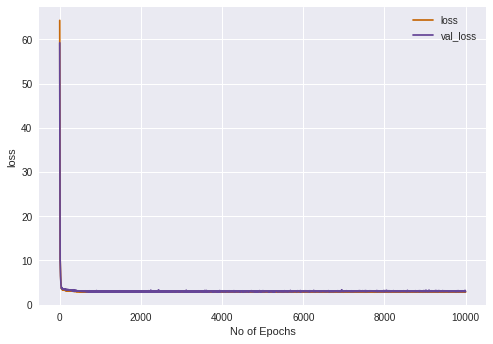

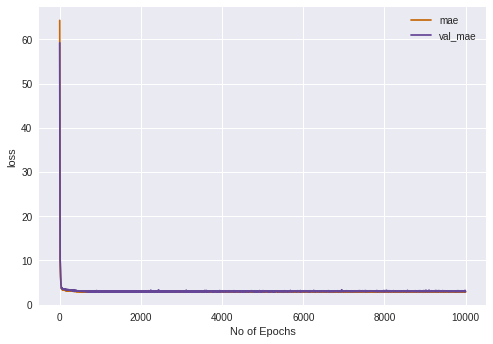

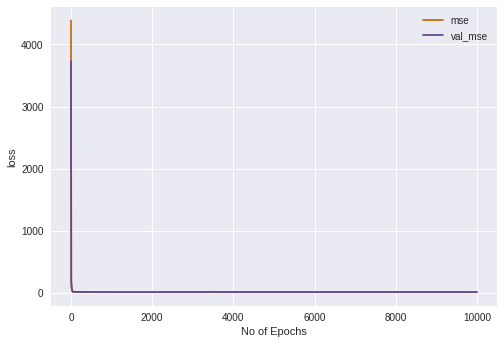

In [36]:
def plotGraphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('No of Epochs')
  plt.ylabel('loss')
  plt.legend([string,f'val_{string}'])
  plt.show()

plotGraphs(history, 'loss')
plotGraphs(history, 'mae')
plotGraphs(history, 'mse')

In [37]:
testPreds=model.predict(testFeatures).flatten()
print(testPreds)

[ 51.974857  47.354248  59.613777  71.584335  71.90964   71.1177
  65.076965  71.019226  80.15171   70.58604   59.345955  62.633404
  70.109985  75.17829   51.646904  58.4052    69.81236   66.489685
  51.51164   51.681717  47.706306  35.56498   81.35823   72.7476
  26.371435  84.141884  78.93231   65.9764    69.14965   89.38924
  52.221485  73.44694   82.53231   66.49306   87.69451   54.00382
  78.80862   53.1928    82.0035    38.969578  66.233406  62.980118
  41.7273    65.85882   78.38719   97.36563   66.84929   72.027214
  50.758995  76.82087   55.850082  79.861534  67.36482   51.648815
  69.82053   49.00456   63.768993  51.614006  77.092064  67.67795
  77.777214  62.016006  54.915417  89.015976  73.02623   47.266098
  65.21221   81.580734  68.4071    65.2217    72.19297   76.29206
  77.35915   41.163857  75.398674  69.83135   83.60155   75.78693
  66.10827   48.04934   84.68099   82.79218   75.14585   70.54797
  59.105873  40.735878  63.478203  46.937897  68.71608   82.42136
  51.4

Prediction plot

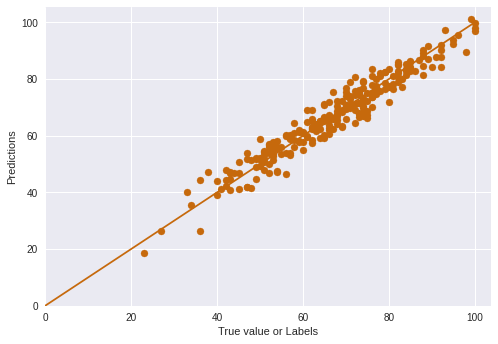

In [39]:
def Predplot(labels,predictions):
  plt.scatter(labels,predictions)
  plt.xlabel('True value or Labels')
  plt.ylabel('Predictions')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

Predplot(testLabels,testPreds)

Error plot

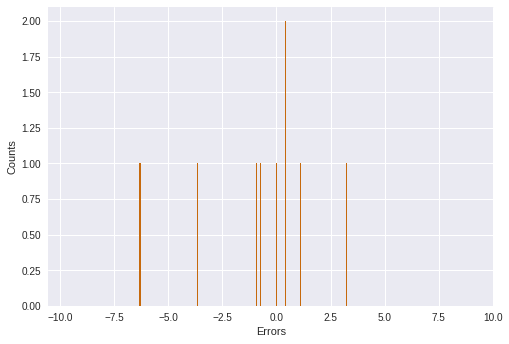

In [40]:
def Errorplot(preds,labels,counts):
  errors=preds-labels
  plt.hist(errors,counts)
  plt.xlabel('Errors')
  plt.ylabel('Counts')
  plt.show()

Errorplot(testPreds,testLabels,numEpochs)